# Logistic Regression

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.special import expit

from mlxtend.plotting import plot_decision_regions
from mlxtend.data import iris_data

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

The only differences between Adaline and Logistic Regression are loss function and activation function.

In [3]:
class LogisticRegressionGD: # Modification of Adaline; GD because the loss function is differentiable
    # we can run the same matrix formulation as in Adaline
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta # learning rate
        self.n_iter=n_iter # number of epochs
        self.random_state = random_state # random state for weights and bias initialization
        
    def net_input(self, X):
        """Calculate the net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
             # w_ and b_ are same as in Adaline
            # we compute the gradient on the entire matrix and update the weights
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            # loss is changed
            # specific to Logistic Regression, one of the ingredients is the specific loss
            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

In [4]:
X, y = iris_data()

X = X[:, [0, 3]] # sepal length and petal length
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

In [5]:
X_scaled = StandardScaler().fit_transform(X)

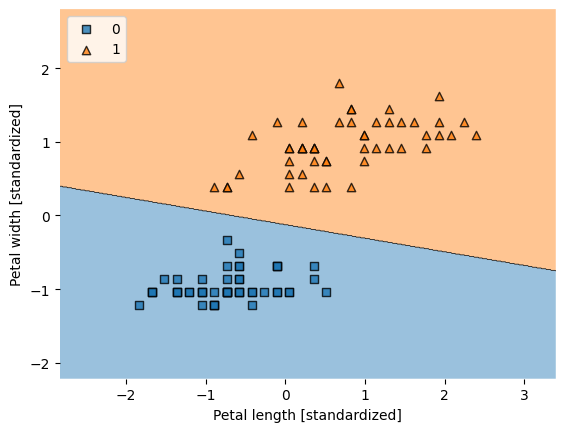

In [6]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_scaled, y)
plot_decision_regions(X=X_scaled, y=y, clf=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

Logistic Regression is a linear model.
Gradient Descent is a way to get minimum/minimize the loss function.

Usually (automatically) instead of gradient descend we have lbfgs

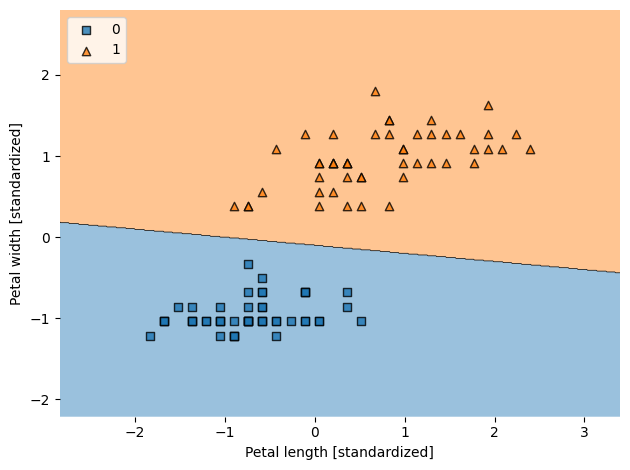

In [7]:
lr = LogisticRegression(C=100.0, solver='lbfgs')
lr.fit(X_scaled, y)

plot_decision_regions(X=X_scaled, y=y, clf=lr)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

As in the case of Perceptron, we get the weights of the model by the coef_ attribute.

In [8]:
lr.coef_

array([[0.93123739, 9.31208542]])

We have two weights. They have different magnitudes.

We can interpret the weights of the Logistic Regression classifier as the importance or sensitivity of the feature associated with a specific coefficient.

Now we take, as an example, the Iris dataset and the weights of the previous classifier and predict the label of a point close to the decision boundary.

In [9]:
lr.predict([[-.1, -0.1]])

array([0])

If we move the point in the direction of the less important weight, i.e. w_1, we can apply a large shift without modyinf the predicted label. We can check.

In [10]:
lr.predict([[-.4, -0.]])

array([1])

Otherwise, a small increase to the direction of the largest weight may result into a change of the prediction.

In [11]:
lr.predict([[-1, 3]])

array([1])

This means that w_2 is more important in the classification than w_1 because it's more sensitive to the change of the feature 2.
In general, the classifier is more sensitive to the change occuring in Feature 2, because the weight w_2 associated with the Feature 2 is higher than w_1 (i.e., it determines more heavily the prediction w.r.t. feature 1).
This is strictly related to the linear model.

We can go inside the classifier by getting the probability prediction (?), the net input (decision_function).

In [12]:
lr.predict_proba(X_scaled)

array([[9.99906106e-01, 9.38937456e-05],
       [9.99929861e-01, 7.01393425e-05],
       [9.99947606e-01, 5.23943077e-05],
       [9.99954716e-01, 4.52839757e-05],
       [9.99918848e-01, 8.11520607e-05],
       [9.96050903e-01, 3.94909704e-03],
       [9.99763617e-01, 2.36383408e-04],
       [9.99918848e-01, 8.11520607e-05],
       [9.99966173e-01, 3.38270584e-05],
       [9.99986565e-01, 1.34347897e-05],
       [9.99854574e-01, 1.45426053e-04],
       [9.99939379e-01, 6.06210115e-05],
       [9.99988388e-01, 1.16115185e-05],
       [9.99994400e-01, 5.59987589e-06],
       [9.99739407e-01, 2.60593017e-04],
       [9.93896410e-01, 6.10358968e-03],
       [9.96050903e-01, 3.94909704e-03],
       [9.99509973e-01, 4.90027013e-04],
       [9.98825161e-01, 1.17483868e-03],
       [9.99509973e-01, 4.90027013e-04],
       [9.99854574e-01, 1.45426053e-04],
       [9.97446840e-01, 2.55316036e-03],
       [9.99954716e-01, 4.52839757e-05],
       [9.86812022e-01, 1.31879780e-02],
       [9.999393

For example, the probability tha Point 0 associated with Feature matrix is related to class 0 is 0.99.

In [13]:
np.sum(lr.predict_proba(X_scaled), axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Well, these are probabilities, of course the sum for each point is 1.

In [14]:
lr.decision_function(X_scaled[:10,:])

array([ -9.27325288,  -9.56495655,  -9.85666021, -10.00251204,
        -9.41910471,  -5.53031141,  -8.34981905,  -9.41910471,
       -10.2942157 , -11.21764954])

In [15]:
# the net input
lr.coef_.dot(X_scaled[:10,:].T) + lr.intercept_

array([[ -9.27325288,  -9.56495655,  -9.85666021, -10.00251204,
         -9.41910471,  -5.53031141,  -8.34981905,  -9.41910471,
        -10.2942157 , -11.21764954]])

In [16]:
lr.coef_.dot(X_scaled[0,:].T) + lr.intercept_

array([-9.27325288])

- This was just to check that the decision function method returns the net input.

We can also get the probability.

In [17]:
expit(lr.coef_.dot(X_scaled[:10,:].T) + lr.intercept_)

array([[9.38937456e-05, 7.01393425e-05, 5.23943077e-05, 4.52839757e-05,
        8.11520607e-05, 3.94909704e-03, 2.36383408e-04, 8.11520607e-05,
        3.38270584e-05, 1.34347897e-05]])

In [18]:
lr.predict_log_proba(X_scaled[:10, :])

array([[-9.38981538e-05, -9.27334678e+00],
       [-7.01418024e-05, -9.56502669e+00],
       [-5.23956803e-05, -9.85671260e+00],
       [-4.52850011e-05, -1.00025573e+01],
       [-8.11553538e-05, -9.41918587e+00],
       [-3.95691531e-03, -5.53426832e+00],
       [-2.36411351e-04, -8.35005546e+00],
       [-8.11553538e-05, -9.41918587e+00],
       [-3.38276306e-05, -1.02942495e+01],
       [-1.34348799e-05, -1.12176630e+01]])

## Overfitting and Regularization
### L2 - Regularization


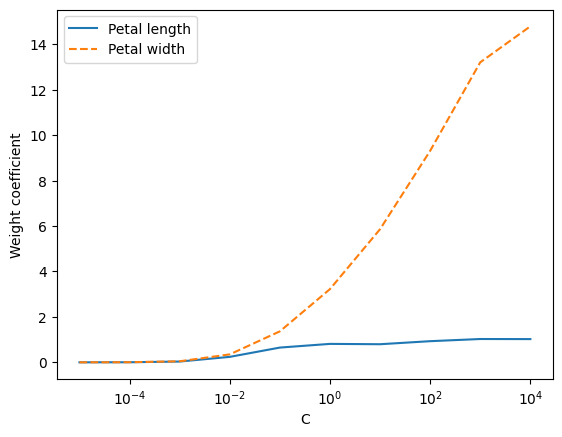

In [19]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c)
    lr.fit(X_scaled, y)
    weights.append(lr.coef_[0])
    params.append(10.**c)
    
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

Usually, when the weights are high, there is an overfitting.
Regularization terms act on the parameters of the model.

## Role of the weights

In [21]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2) # 2 features are not important and can be removed
lr_clf = LogisticRegression(penalty=None)
lr_clf.fit(X, y)

LogisticRegression(penalty=None)

In [22]:
def odds(p):
    return p / (1 - p)

In [23]:
x_test = X[0, :]
w, b = lr_clf.coef_[0], lr_clf.intercept_[0]
p = expit(b + w.dot(x_test.T))
for j in range(len(x_test)): # for each dimension
    x_test_1 = x_test.copy()
    x_test_1[j] = x_test_1[j] + 1
    p_1 = expit(b + w.dot(x_test_1.T))
    print(f'Weight: {w[j]}, exp_weight: {np.exp(w[j])} - Odds ratio: {odds(p_1)/odds(p)}')

Weight: -0.3699321172627082, exp_weight: 0.6907812211659704 - Odds ratio: 0.6907812211659703
Weight: -0.021749280869088543, exp_weight: 0.9784855293414654 - Odds ratio: 0.9784855293414654
Weight: 0.0407752770764523, exp_weight: 1.0416180037994167 - Odds ratio: 1.0416180037994167
Weight: 0.11240726033771488, exp_weight: 1.1189684793418246 - Odds ratio: 1.1189684793418246
Weight: 0.07679683732640843, exp_weight: 1.0798226744446668 - Odds ratio: 1.079822674444667
Weight: 0.04238838197125026, exp_weight: 1.0432995988298015 - Odds ratio: 1.0432995988298017
Weight: 0.20607238032846165, exp_weight: 1.228842144774558 - Odds ratio: 1.2288421447745574
Weight: -0.4251135929413431, exp_weight: 0.6536955257147457 - Odds ratio: 0.653695525714746
Weight: -0.3796874139990371, exp_weight: 0.6840752081290077 - Odds ratio: 0.6840752081290075
Weight: -0.20179457171603563, exp_weight: 0.817262799593322 - Odds ratio: 0.817262799593322


The highest increase is 1.228. The probability is doubled (even more). The weight associated with the odds ratio is the largest weight.
The larger the weight, higher the sensitivity of the feature associated with the weight.